In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## UCI Dataset

Problem Stat: assessing the heating load and cooling load requirements of building

Energy efficiency Data Set 

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.
It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data"
att=['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height ','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']
df=pd.read_excel(url,names=att)

In [3]:
df.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [6]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [50]:
# Define input & output varaible
x=df.drop(['Heating Load','Cooling Load'],axis=1)
print(x.shape)
y=df[['Heating Load','Cooling Load']]
y1=df['Heating Load']
y.head()
x.head()


(768, 8)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


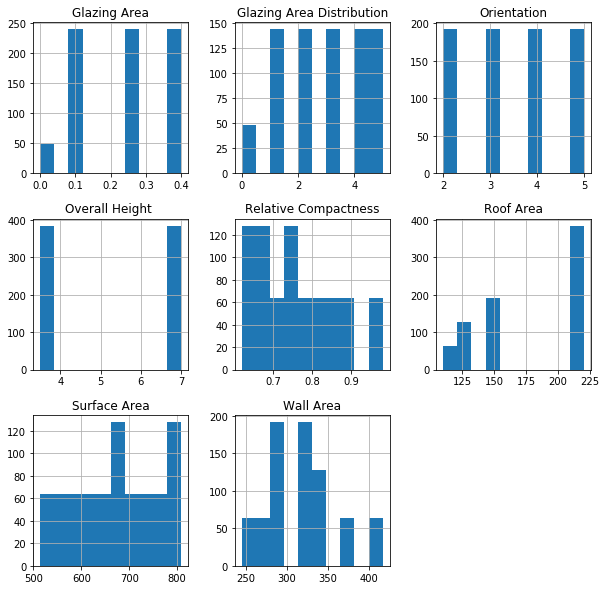

In [8]:
# EDA
x.hist(figsize = (10,10))
plt.show()

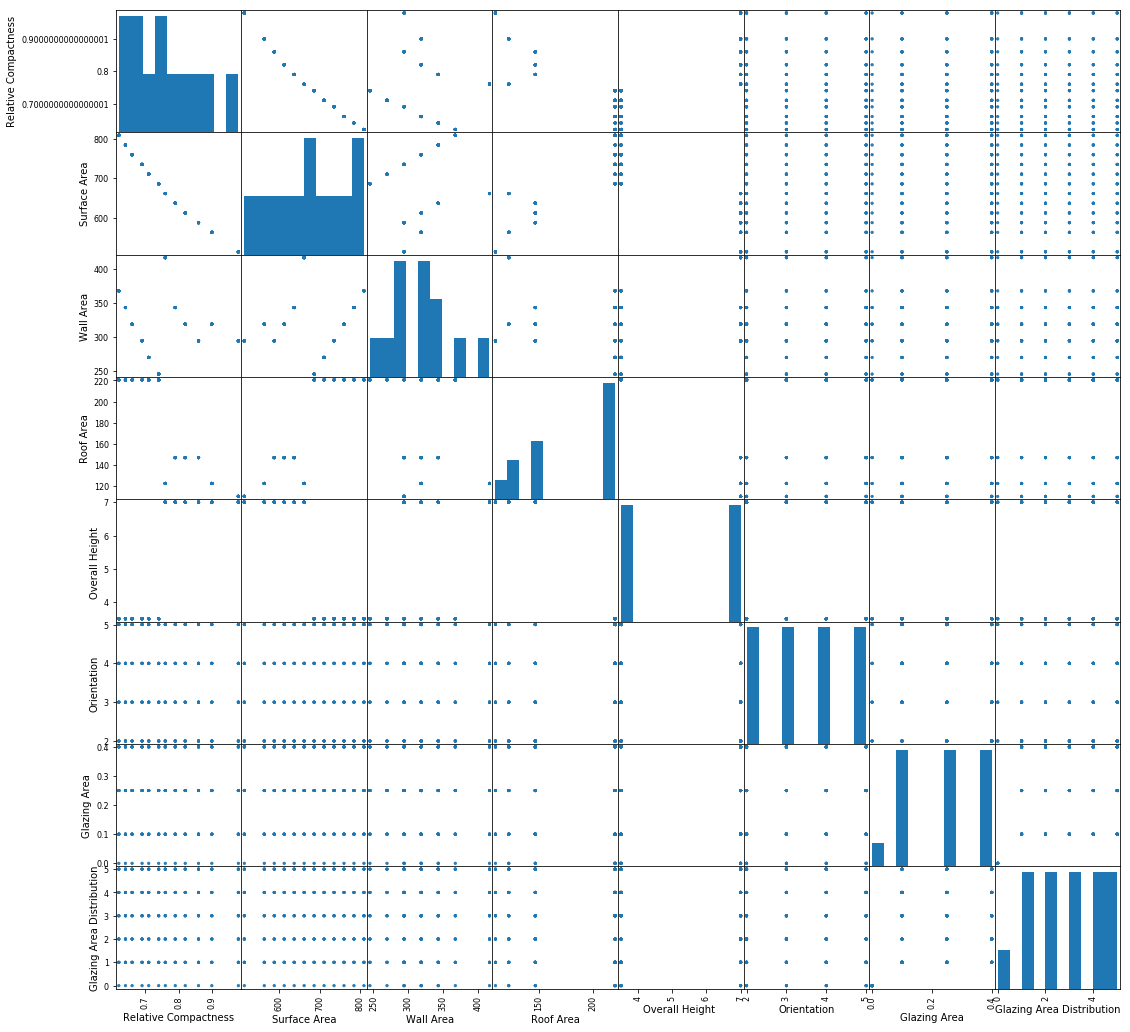

In [9]:
# from pandas.tools.plotting import scatter_matrix 

from pandas.plotting import scatter_matrix
scatter_matrix(x, figsize=(18,18))
plt.show()

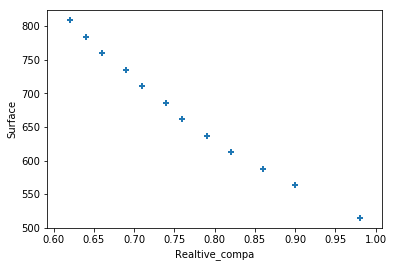

In [11]:
x1=x['Relative Compactness']
y1=x['Surface Area']


plt.scatter(x1,y1,marker='+')
plt.xlabel('Realtive_compa')
plt.ylabel('Surface')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0616D8>]],
      dtype=object)

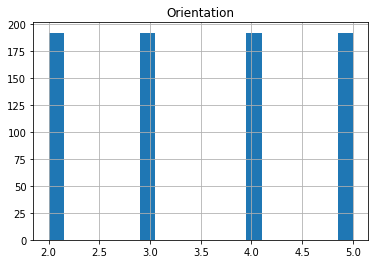

In [16]:
x.hist('Orientation', bins=20)

In [17]:
x.Orientation.value_counts()

5    192
4    192
3    192
2    192
Name: Orientation, dtype: int64

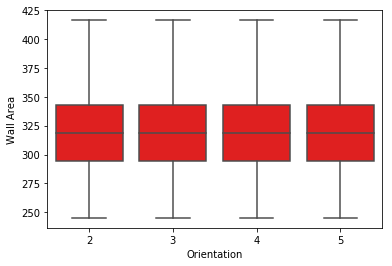

In [33]:
#x.boxplot('Orientation',patch_artist=False)
sns.boxplot(x['Orientation'],x['Wall Area'],color='red',orient='v')

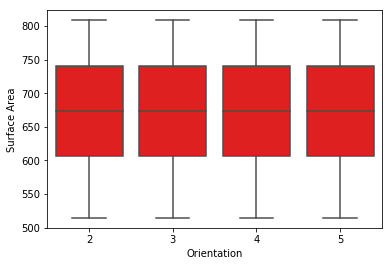

In [35]:
sns.boxplot(x['Orientation'],x['Surface Area'],color='red',orient='v')

In [48]:
# Analyse correlation between varaiables
corr_matrix= x.corr()
corr_matrix

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.0,1.283986e-17,1.764620e-17
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.0,1.318356e-16,-3.558613e-16
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.0,-7.969726e-19,0.000000e+00
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.0,-1.381805e-16,-1.079129e-16
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.0,1.861418e-18,0.000000e+00
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.0,1.000000e+00,2.129642e-01
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.0,2.129642e-01,1.000000e+00


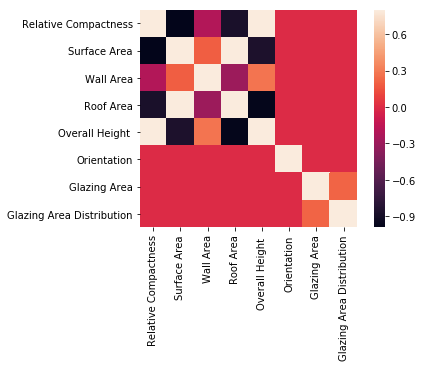

In [49]:
# Correlation between varaibles (Heatmap)

fig= plt.Figure(figsize=(12,9))
sns.heatmap(corr_matrix,vmax=.8,square=True)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2)

In [55]:
x_train.shape

(614, 8)

In [56]:
x_test.shape

(154, 8)

##  apply to Muiltiple Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_pred=reg.predict(x_test)

In [62]:
y_pred


array([31.83845392, 14.75533653, 28.26706191, 13.31873795, 29.21387571,
       15.9121382 , 32.90110687, 13.139932  , 29.26208659,  8.81299194,
       15.53280882, 14.09143035, 15.86392731, 30.79639905, 13.54575479,
       12.65014722, 30.97859744, 12.87716406, 11.06580923, 15.52802892,
       11.37989482,  7.76029192, 33.80917423, 15.62445069, 11.70333342,
       11.47631658, 35.68964678, 26.75275975, 17.46687206, 12.71239173,
       37.39600923, 13.2146363 , 13.27052707, 13.85972895, 27.93206949,
       14.23137845, 29.44089255, 12.92537494, 15.24512131, 29.28548933,
       33.95380688, 30.975205  ,  9.30577205, 10.60720242,  8.35895826,
       32.29706073, 14.236063  , 10.15316874, 13.68560755, 29.69131212,
       36.71495871, 39.28186159,  7.51308331,  6.89270346, 30.33420399,
        7.85671369, 14.13964123, 33.67998457, 11.51984291, 27.07603484,
       30.88217568, 12.14022277, 25.24273291, 39.88052792, 18.37493942,
       12.44962379, 13.59396568, 39.42649424, 28.67288471, 15.67

In [63]:
reg.score(x_test,y_test)

0.9268707018590954

In [70]:
reg.predict([[0.79,637,343,147,7,3,0,0]])

array([27.12424572])

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y1)

array([0.81823766, 0.91897848, 0.90378207])

## Randomforest regression

In [78]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
rf.fit(x_train,y_train)

y_pred1= rf.predict(x_test)

In [74]:
y_pred1

array([26.67147645, 17.0703385 , 25.03262179, 12.77854757, 32.52997786,
       14.22928342, 33.98701796, 12.78184268, 32.52997786, 10.46579005,
       17.07478623, 14.25488553, 14.19776984, 33.17023856, 12.77854757,
       12.25813704, 26.72766479, 12.25813704, 10.61289057, 14.49773803,
       12.24359583,  9.98394211, 33.93205477, 14.5228361 , 12.24835196,
       12.24835196, 41.536004  , 25.7603698 , 18.34664697, 13.50802285,
       37.85826645, 13.50968043, 12.77854757, 12.82165343, 26.7460676 ,
       12.82759742, 33.64732884, 12.25813704, 14.70113792, 29.26973004,
       33.96699802, 33.1588339 , 10.71330486, 11.2834515 , 10.4692599 ,
       38.15723553, 14.28639911, 11.29438347, 14.47317075, 29.27370574,
       37.8573203 , 40.43192816,  8.16272063,  8.1502373 , 32.41549549,
        9.97657835, 14.25488553, 31.77188551, 11.35347001, 32.52997786,
       26.74968052, 14.69539582, 25.5100067 , 40.42790086, 18.3340717 ,
       14.70670718, 12.78449155, 40.43356975, 24.95669132, 14.52

In [79]:
rf.score(x_test,y_test)

0.9811906338063057

##  compare to linear model, Randomforest provide better result  & accuracy